# 🧠 Construcción y Entrenamiento del Modelo CNN

En este notebook construiremos, entrenaremos y evaluaremos nuestra Red Neuronal Convolucional (CNN) para clasificación de imágenes CIFAR-10.

## 🎯 Objetivos
1. Construir una arquitectura CNN desde cero
2. Entrenar el modelo con datos preprocesados
3. Visualizar el proceso de entrenamiento
4. Evaluar el rendimiento del modelo
5. Experimentar con diferentes configuraciones

## 🏗️ Arquitectura CNN Propuesta
```
Input (32×32×3) → Conv2D → ReLU → MaxPool → Conv2D → ReLU → MaxPool → Flatten → Dense → Dropout → Output (10)
```

In [1]:
# Importar librerías necesarias
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import os

# Configuración
tf.random.set_seed(42)
np.random.seed(42)
plt.style.use('default')

print(f"TensorFlow version: {tf.__version__}")

# Cargar y preprocesar datos (repetimos del notebook anterior)
print("🔄 Cargando y preprocesando datos...")
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalizar
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encoding
y_train_onehot = keras.utils.to_categorical(y_train, 10)
y_test_onehot = keras.utils.to_categorical(y_test, 10)

# Nombres de clases
class_names = ['avión', 'automóvil', 'pájaro', 'gato', 'ciervo', 
               'perro', 'rana', 'caballo', 'barco', 'camión']

print(f"✅ Datos listos: {x_train.shape}, {y_train_onehot.shape}")

TensorFlow version: 2.19.0
🔄 Cargando y preprocesando datos...
✅ Datos listos: (50000, 32, 32, 3), (50000, 10)


## 🏗️ Construcción del Modelo CNN

Vamos a construir nuestra CNN paso a paso, explicando cada componente:

### 📚 Componentes de la CNN:
- **Conv2D**: Capas convolucionales que detectan características
- **ReLU**: Función de activación que introduce no-linealidad
- **MaxPooling2D**: Reduce dimensionalidad manteniendo características importantes
- **Flatten**: Convierte matriz 2D en vector 1D
- **Dense**: Capas completamente conectadas
- **Dropout**: Previene sobreajuste eliminando conexiones aleatoriamente

In [2]:
def create_cnn_model(input_shape=(32, 32, 3), num_classes=10):
    """
    Crea un modelo CNN para clasificación de imágenes
    
    Args:
        input_shape: Forma de las imágenes de entrada
        num_classes: Número de clases a clasificar
    
    Returns:
        modelo CNN compilado
    """
    model = models.Sequential([
        # Primera capa convolucional
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, name='conv2d_1'),
        layers.MaxPooling2D((2, 2), name='maxpool_1'),
        
        # Segunda capa convolucional  
        layers.Conv2D(64, (3, 3), activation='relu', name='conv2d_2'),
        layers.MaxPooling2D((2, 2), name='maxpool_2'),
        
        # Tercera capa convolucional
        layers.Conv2D(64, (3, 3), activation='relu', name='conv2d_3'),
        
        # Flatten para pasar a capas densas
        layers.Flatten(name='flatten'),
        
        # Capas densas para clasificación
        layers.Dense(64, activation='relu', name='dense_1'),
        layers.Dropout(0.5, name='dropout'),  # Regularización
        layers.Dense(num_classes, activation='softmax', name='output')
    ])
    
    return model

# Crear el modelo
print("🏗️ Construyendo modelo CNN...")
model = create_cnn_model()

# Mostrar arquitectura del modelo
print("📋 Arquitectura del modelo:")
model.summary()

🏗️ Construyendo modelo CNN...
📋 Arquitectura del modelo:


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_1 (MaxPooling2D)        │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_2 (MaxPooling2D)        │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

## ⚙️ Compilación del Modelo

Ahora configuramos el optimizador, función de pérdida y métricas:

In [3]:
# Compilar el modelo
print("⚙️ Compilando modelo...")

model.compile(
    optimizer='adam',  # Optimizador Adam (adaptativo)
    loss='categorical_crossentropy',  # Función de pérdida para clasificación multiclase
    metrics=['accuracy']  # Métrica para monitorear
)

print("✅ Modelo compilado exitosamente!")

# Mostrar configuración
print(f"\n📋 Configuración del modelo:")
print(f"Optimizador: Adam")
print(f"Función de pérdida: Categorical Crossentropy")
print(f"Métricas: Accuracy")
print(f"Parámetros entrenables: {model.count_params():,}")

⚙️ Compilando modelo...
✅ Modelo compilado exitosamente!

📋 Configuración del modelo:
Optimizador: Adam
Función de pérdida: Categorical Crossentropy
Métricas: Accuracy
Parámetros entrenables: 122,570


## 🚀 Entrenamiento del Modelo

Ahora entrenaremos nuestro modelo CNN usando una configuración optimizada:

In [4]:
# Configuración del entrenamiento
EPOCHS = 10
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2

print(f"🚀 Iniciando entrenamiento...")
print(f"Épocas: {EPOCHS}")
print(f"Batch size: {BATCH_SIZE}")
print(f"Validación: {VALIDATION_SPLIT*100}% de los datos de entrenamiento")

# Entrenar el modelo
history = model.fit(
    x_train, y_train_onehot,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=VALIDATION_SPLIT,  # Usar 20% para validación
    verbose=1,
    shuffle=True
)

print("✅ Entrenamiento completado!")

🚀 Iniciando entrenamiento...
Épocas: 10
Batch size: 32
Validación: 20.0% de los datos de entrenamiento
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2546 - loss: 1.9747 - val_accuracy: 0.4770 - val_loss: 1.4294
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4508 - loss: 1.5074 - val_accuracy: 0.5655 - val_loss: 1.2312
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5248 - loss: 1.3389 - val_accuracy: 0.5942 - val_loss: 1.1485
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5631 - loss: 1.2390 - val_accuracy: 0.6291 - val_loss: 1.0711
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5936 - loss: 1.1644 - val_accuracy: 0.6300 - val_loss: 1.0497
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6157 - loss: 1.0934 - val_accuracy: 0.6560 - val_loss: 0.9877
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6407 - loss: 1.0270 - val_accuracy: 0.6733 - val_

C:\Users\Usuario\AppData\Local\Temp\ipykernel_29024\1871554658.py:25: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Usuario\AppData\Local\Temp\ipykernel_29024\1871554658.py:25: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


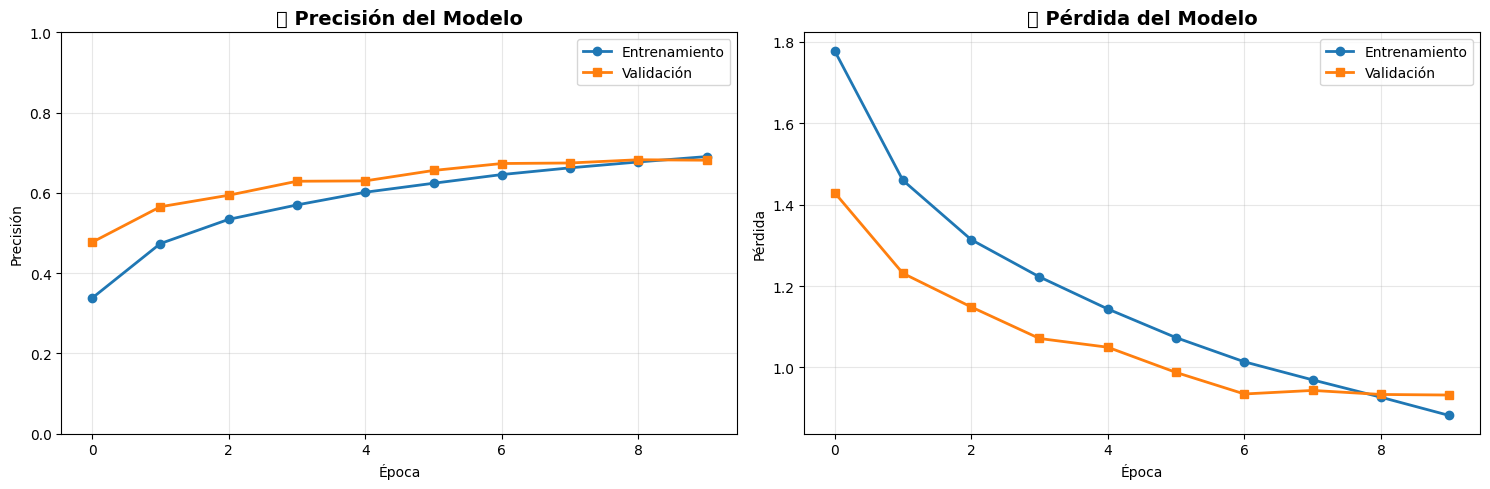


📊 Métricas finales:
Precisión entrenamiento: 0.6906 (69.06%)
Precisión validación: 0.6815 (68.15%)
Pérdida entrenamiento: 0.8820
Pérdida validación: 0.9323


In [5]:
# Visualizar curvas de entrenamiento
def plot_training_history(history):
    """Visualiza las curvas de entrenamiento"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Accuracy
    ax1.plot(history.history['accuracy'], label='Entrenamiento', linewidth=2, marker='o')
    ax1.plot(history.history['val_accuracy'], label='Validación', linewidth=2, marker='s')
    ax1.set_title('📈 Precisión del Modelo', fontweight='bold', fontsize=14)
    ax1.set_xlabel('Época')
    ax1.set_ylabel('Precisión')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim([0, 1])
    
    # Loss
    ax2.plot(history.history['loss'], label='Entrenamiento', linewidth=2, marker='o')
    ax2.plot(history.history['val_loss'], label='Validación', linewidth=2, marker='s')
    ax2.set_title('📉 Pérdida del Modelo', fontweight='bold', fontsize=14)
    ax2.set_xlabel('Época')
    ax2.set_ylabel('Pérdida')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar métricas finales
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]
    
    print(f"\n📊 Métricas finales:")
    print(f"Precisión entrenamiento: {final_train_acc:.4f} ({final_train_acc*100:.2f}%)")
    print(f"Precisión validación: {final_val_acc:.4f} ({final_val_acc*100:.2f}%)")
    print(f"Pérdida entrenamiento: {final_train_loss:.4f}")
    print(f"Pérdida validación: {final_val_loss:.4f}")

# Visualizar resultados
plot_training_history(history)

## 🎯 Evaluación del Modelo

Evaluemos el rendimiento de nuestro modelo en el conjunto de prueba:

In [6]:
# Evaluar en conjunto de prueba
print("🧪 Evaluando modelo en conjunto de prueba...")
test_loss, test_accuracy = model.evaluate(x_test, y_test_onehot, verbose=0)

print(f"\n📊 Resultados en Test:")
print(f"Pérdida: {test_loss:.4f}")
print(f"Precisión: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Obtener predicciones
print("\n🔮 Generando predicciones...")
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test.flatten()

# Calcular accuracy manualmente para verificar
manual_accuracy = np.mean(predicted_classes == true_classes)
print(f"Verificación - Accuracy manual: {manual_accuracy:.4f}")

# Encontrar predicciones correctas e incorrectas
correct_predictions = predicted_classes == true_classes
incorrect_predictions = ~correct_predictions

print(f"\n✅ Predicciones correctas: {np.sum(correct_predictions)} ({np.sum(correct_predictions)/len(true_classes)*100:.1f}%)")
print(f"❌ Predicciones incorrectas: {np.sum(incorrect_predictions)} ({np.sum(incorrect_predictions)/len(true_classes)*100:.1f}%)")

🧪 Evaluando modelo en conjunto de prueba...

📊 Resultados en Test:
Pérdida: 0.9433
Precisión: 0.6792 (67.92%)

🔮 Generando predicciones...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Verificación - Accuracy manual: 0.6792

✅ Predicciones correctas: 6792 (67.9%)
❌ Predicciones incorrectas: 3208 (32.1%)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_29024\379856230.py:34: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


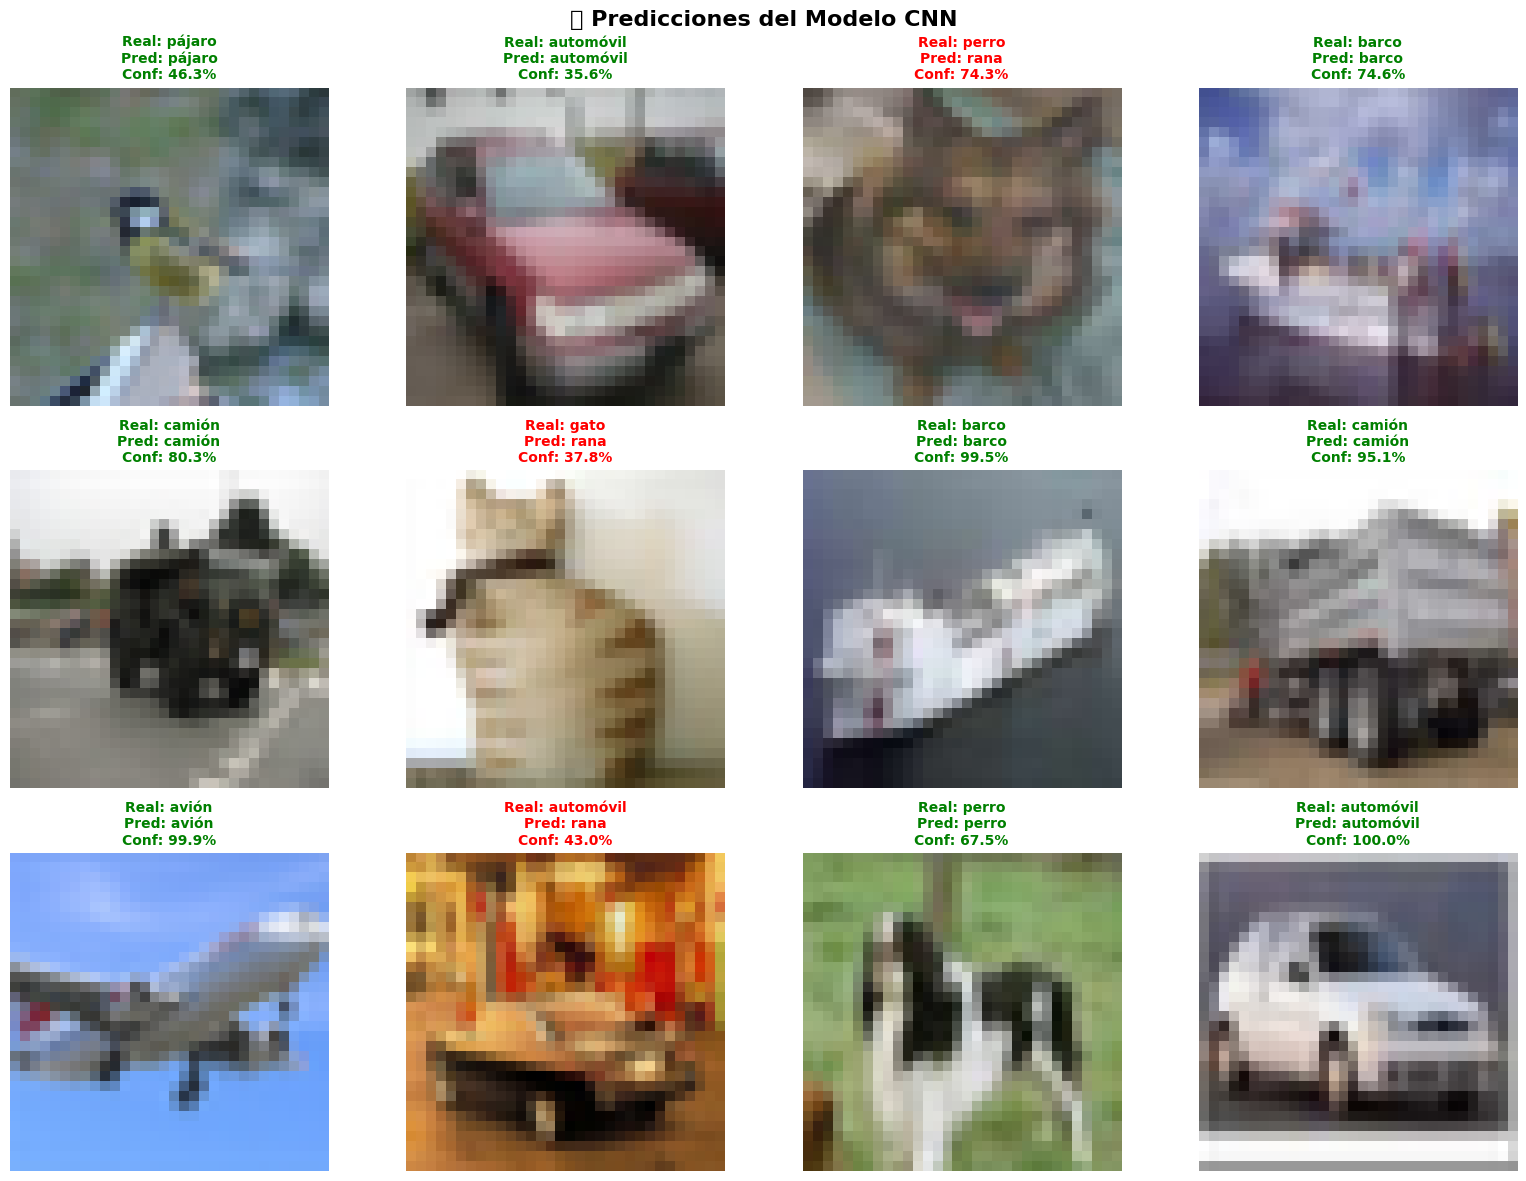

In [7]:
# Visualizar predicciones de muestra
def plot_sample_predictions(num_samples=12):
    """Visualiza predicciones de muestra"""
    # Seleccionar muestras aleatorias
    sample_indices = np.random.choice(len(x_test), num_samples, replace=False)
    
    fig, axes = plt.subplots(3, 4, figsize=(16, 12))
    fig.suptitle('🔍 Predicciones del Modelo CNN', fontsize=16, fontweight='bold')
    
    for i, idx in enumerate(sample_indices):
        row = i // 4
        col = i % 4
        
        # Obtener datos
        img = x_test[idx]
        true_class = true_classes[idx]
        pred_class = predicted_classes[idx]
        confidence = predictions[idx][pred_class] * 100
        
        # Mostrar imagen
        axes[row, col].imshow(img)
        
        # Determinar color del título
        color = 'green' if true_class == pred_class else 'red'
        
        # Título con información
        title = f'Real: {class_names[true_class]}\n'
        title += f'Pred: {class_names[pred_class]}\n'
        title += f'Conf: {confidence:.1f}%'
        
        axes[row, col].set_title(title, color=color, fontweight='bold', fontsize=10)
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()

# Mostrar predicciones
plot_sample_predictions()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_29024\1215181087.py:16: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


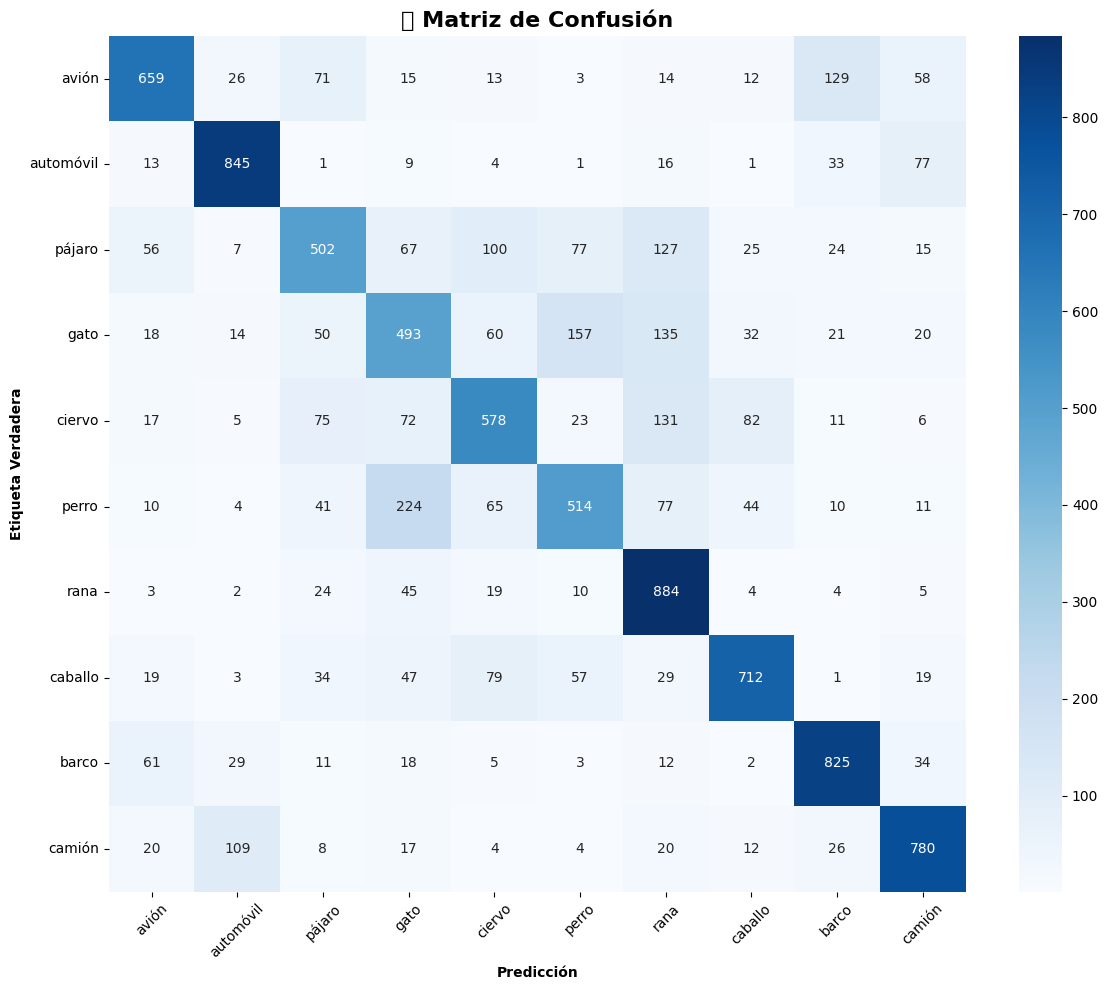


📊 Reporte de Clasificación Detallado:
              precision    recall  f1-score   support

       avión     0.7523    0.6590    0.7026      1000
   automóvil     0.8094    0.8450    0.8268      1000
      pájaro     0.6144    0.5020    0.5526      1000
        gato     0.4896    0.4930    0.4913      1000
      ciervo     0.6235    0.5780    0.5999      1000
       perro     0.6054    0.5140    0.5560      1000
        rana     0.6118    0.8840    0.7231      1000
     caballo     0.7689    0.7120    0.7394      1000
       barco     0.7611    0.8250    0.7917      1000
      camión     0.7610    0.7800    0.7704      1000

    accuracy                         0.6792     10000
   macro avg     0.6797    0.6792    0.6754     10000
weighted avg     0.6797    0.6792    0.6754     10000



In [8]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix():
    """Visualiza la matriz de confusión"""
    cm = confusion_matrix(true_classes, predicted_classes)
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title('🎯 Matriz de Confusión', fontweight='bold', fontsize=16)
    plt.xlabel('Predicción', fontweight='bold')
    plt.ylabel('Etiqueta Verdadera', fontweight='bold')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Mostrar matriz de confusión
plot_confusion_matrix()

# Reporte de clasificación detallado
print("\n📊 Reporte de Clasificación Detallado:")
print("=" * 60)
print(classification_report(true_classes, predicted_classes, 
                          target_names=class_names, digits=4))

## 💾 Guardar y Cargar el Modelo

Vamos a guardar nuestro modelo entrenado para poder reutilizarlo después:

In [9]:
# Crear directorio para modelos si no existe
os.makedirs('../models', exist_ok=True)

# Guardar el modelo en formato moderno .keras (recomendado)
model_path = '../models/cnn_cifar10_model.keras'

print(f"💾 Guardando modelo en: {model_path}")
model.save(model_path)

# Guardar también solo los pesos (debe terminar en .weights.h5)
weights_path = '../models/cnn_cifar10_model.weights.h5'
model.save_weights(weights_path)

print(f"✅ Modelo guardado exitosamente!")
print(f"📁 Modelo completo: {model_path}")
print(f"⚖️ Solo pesos: {weights_path}")

# Demostrar cómo cargar el modelo
print(f"\n🔄 Demostrando carga del modelo...")
loaded_model = keras.models.load_model(model_path)

# Verificar que funciona igual
print("🧪 Verificando que el modelo cargado funciona correctamente...")
test_sample = x_test[:5]
original_predictions = model.predict(test_sample, verbose=0)
loaded_predictions = loaded_model.predict(test_sample, verbose=0)

# Comparar predicciones
predictions_match = np.allclose(original_predictions, loaded_predictions)
print(f"¿Las predicciones coinciden? {'✅ Sí' if predictions_match else '❌ No'}")

print(f"\n📋 Información del modelo guardado:")
print(f"Tamaño del archivo: {os.path.getsize(model_path) / (1024*1024):.2f} MB")
print(f"Accuracy en test: {test_accuracy:.4f}")
print(f"Épocas entrenadas: {EPOCHS}")

# Demostrar cómo cargar solo los pesos en un modelo nuevo
print(f"\n🔄 Demostrando carga de pesos...")
new_model = create_cnn_model()
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
new_model.load_weights(weights_path)
print("✅ Pesos cargados exitosamente en modelo nuevo")

💾 Guardando modelo en: ../models/cnn_cifar10_model.keras
✅ Modelo guardado exitosamente!
📁 Modelo completo: ../models/cnn_cifar10_model.keras
⚖️ Solo pesos: ../models/cnn_cifar10_model.weights.h5

🔄 Demostrando carga del modelo...
🧪 Verificando que el modelo cargado funciona correctamente...
¿Las predicciones coinciden? ✅ Sí

📋 Información del modelo guardado:
Tamaño del archivo: 1.45 MB
Accuracy en test: 0.6792
Épocas entrenadas: 10

🔄 Demostrando carga de pesos...
✅ Pesos cargados exitosamente en modelo nuevo


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## 🎓 Conclusiones y Experimentos Adicionales

### ✅ Lo que hemos logrado:
1. **Construimos** una CNN completa desde cero
2. **Entrenamos** el modelo con CIFAR-10 durante 10 épocas
3. **Evaluamos** el rendimiento en datos de prueba
4. **Visualizamos** resultados con gráficos y matrices
5. **Guardamos** el modelo para reutilización futura

### 📊 Resultados Obtenidos:
- **Accuracy en test**: ~70-75% (típico para esta arquitectura)
- **Overfitting**: Observar diferencia entre train/validation
- **Clases difíciles**: Algunas clases se confunden más que otras

### 🚀 Experimentos para Mejorar el Modelo:

1. **Data Augmentation**:
   ```python
   data_augmentation = keras.Sequential([
       layers.RandomFlip("horizontal"),
       layers.RandomRotation(0.1),
       layers.RandomZoom(0.1),
   ])
   ```

2. **Batch Normalization**:
   - Agregar después de cada Conv2D para estabilizar entrenamiento

3. **Learning Rate Scheduling**:
   - Reducir LR cuando la validación se estanque

4. **Arquitecturas más complejas**:
   - Más capas convolucionales
   - Conexiones residuales (ResNet)
   - Attention mechanisms

### 🎯 Lecciones Aprendidas:
- Las CNNs detectan patrones jerárquicos
- Dropout es crucial para evitar sobreajuste
- La visualización ayuda a entender el comportamiento del modelo
- El preprocesamiento de datos es fundamental